In [1]:
match1<-read.csv("Train_Match_1.csv")

In [2]:
library(dplyr)
library(magrittr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
: package ‘ggplot2’ was built under R version 3.2.5

In [3]:
summary(match1)


    recordid         iid              id           gender         idg      
 Min.   :   3   Min.   :  1.0   Min.   : 1.0   Min.   :0.0   Min.   : 1.0  
 1st Qu.:1753   1st Qu.:122.0   1st Qu.: 4.0   1st Qu.:0.0   1st Qu.: 8.0  
 Median :3560   Median :250.0   Median : 8.0   Median :0.5   Median :16.0  
 Mean   :3668   Mean   :248.7   Mean   : 8.7   Mean   :0.5   Mean   :16.8  
 3rd Qu.:5563   3rd Qu.:369.0   3rd Qu.:12.0   3rd Qu.:1.0   3rd Qu.:24.0  
 Max.   :7408   Max.   :508.0   Max.   :21.0   Max.   :1.0   Max.   :42.0  
                                                                           
     condtn           wave            round          position     
 Min.   :1.000   Min.   : 1.000   Min.   : 5.00   Min.   : 1.000  
 1st Qu.:2.000   1st Qu.: 5.000   1st Qu.:11.00   1st Qu.: 4.000  
 Median :2.000   Median :10.000   Median :18.00   Median : 8.000  
 Mean   :1.765   Mean   : 9.964   Mean   :15.91   Mean   : 8.578  
 3rd Qu.:2.000   3rd Qu.:14.000   3rd Qu.:20.00   3rd Qu.

In [4]:
str(match1)

'data.frame':	1236 obs. of  196 variables:
 $ recordid: int  3 4 5 9 14 19 34 39 44 49 ...
 $ iid     : int  1 1 1 1 2 2 4 4 5 5 ...
 $ id      : int  1 1 1 1 2 2 4 4 5 5 ...
 $ gender  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ idg     : int  1 1 1 1 3 3 7 7 9 9 ...
 $ condtn  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ wave    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ round   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ position: int  7 7 7 7 3 3 6 6 4 4 ...
 $ positin1: int  NA NA NA NA NA NA NA NA NA NA ...
 $ order   : int  10 5 7 8 1 4 4 7 2 5 ...
 $ partner : int  3 4 5 9 4 9 4 9 4 9 ...
 $ pid     : int  13 14 15 19 14 19 14 19 14 19 ...
 $ match   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ int_corr: num  0.16 0.61 0.21 0.28 -0.21 0.11 -0.18 -0.47 0.08 -0.13 ...
 $ samerace: int  1 0 0 0 1 1 1 1 1 1 ...
 $ age_o   : int  22 23 24 28 23 28 23 28 23 28 ...
 $ race_o  : int  4 2 3 2 2 2 2 2 2 2 ...
 $ pf_o_att: num  19 30 30 50 30 50 30 50 30 50 ...
 $ pf_o_sin: num  18 5 10 0 5 0 5 0 5 0 ...
 $ pf_o_int: num  19 15 

In [5]:
match1_selected<-match1 %>% 
    select(idg,gender,int_corr,samerace,age_o ,race_o,age,field_cd,undergra,mn_sat,race,zipcode,income,goal,career_c) 

In [6]:
match1_selected<-match1_selected %>%
    mutate_each(funs(as.factor),gender,samerace,race_o,field_cd,race,goal ,career_c) %>%
    mutate_each(funs(as.numeric),income)


In [7]:
str(match1_selected)

'data.frame':	1236 obs. of  15 variables:
 $ idg     : int  1 1 1 1 3 3 7 7 9 9 ...
 $ gender  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ int_corr: num  0.16 0.61 0.21 0.28 -0.21 0.11 -0.18 -0.47 0.08 -0.13 ...
 $ samerace: Factor w/ 2 levels "0","1": 2 1 1 1 2 2 2 2 2 2 ...
 $ age_o   : int  22 23 24 28 23 28 23 28 23 28 ...
 $ race_o  : Factor w/ 5 levels "1","2","3","4",..: 4 2 3 2 2 2 2 2 2 2 ...
 $ age     : int  21 21 21 21 24 24 23 23 21 21 ...
 $ field_cd: Factor w/ 18 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ undergra: Factor w/ 174 levels "","American University",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mn_sat  : Factor w/ 53 levels "","1,011.00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ race    : Factor w/ 5 levels "1","2","3","4",..: 4 4 4 4 2 2 2 2 2 2 ...
 $ zipcode : Factor w/ 315 levels "","0","1,040",..: 201 201 201 201 153 153 243 243 301 301 ...
 $ income  : num  181 181 181 181 179 179 79 79 196 196 ...
 $ goal    : Factor w/ 6 levels "1","2","3","4",..: 2 2 2 

# Race vs Gender
如何整理出人數?

?如何將table值除以22
?如何在圖上加上註解

   
      1   2   3   4   6
  0  52 312  69 124  52
  1  31 398  45  94  45

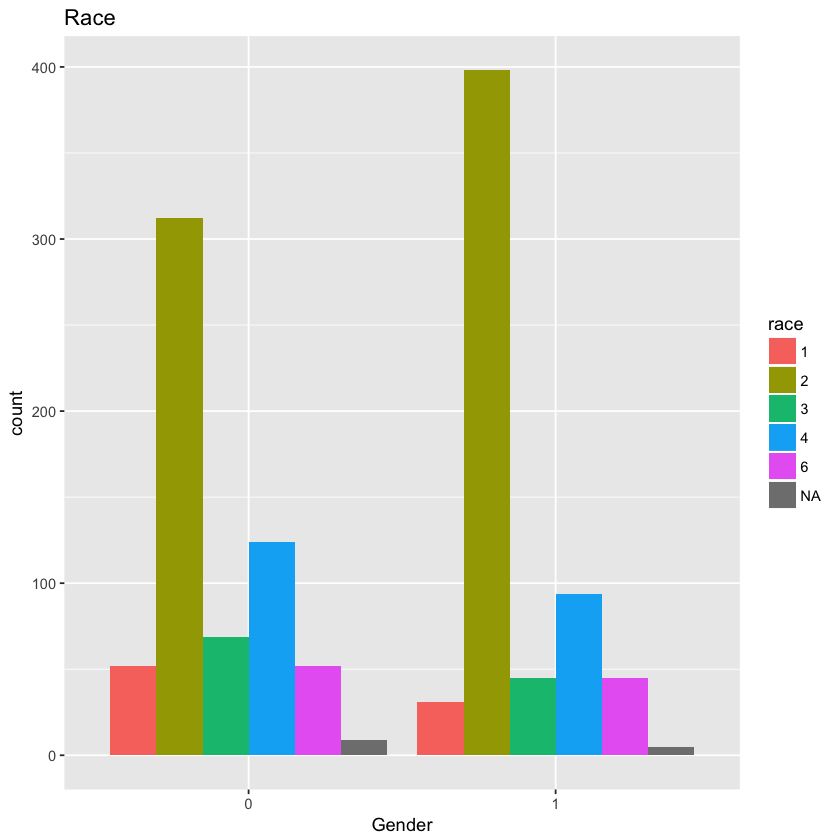

In [8]:
table(match1_selected$gender,match1_selected$race)
ggplot(data=match1_selected,aes(gender))+ 
      geom_bar(aes(fill=race),position = "dodge") +
        ggtitle("Race") +
        xlab("Gender")

#Female=0;Male=1
#Black/African American=1;
#European/Caucasian-American=2
#Latino/Hispanic American=3
#Asian/Pacific Islander/Asian-American=4
#Native American=5
#Other=6

# Race vs Goal

   
      1   2   3   4   5   6
  0 281 214  23  20  45  25
  1 239 202  70  31  34  37

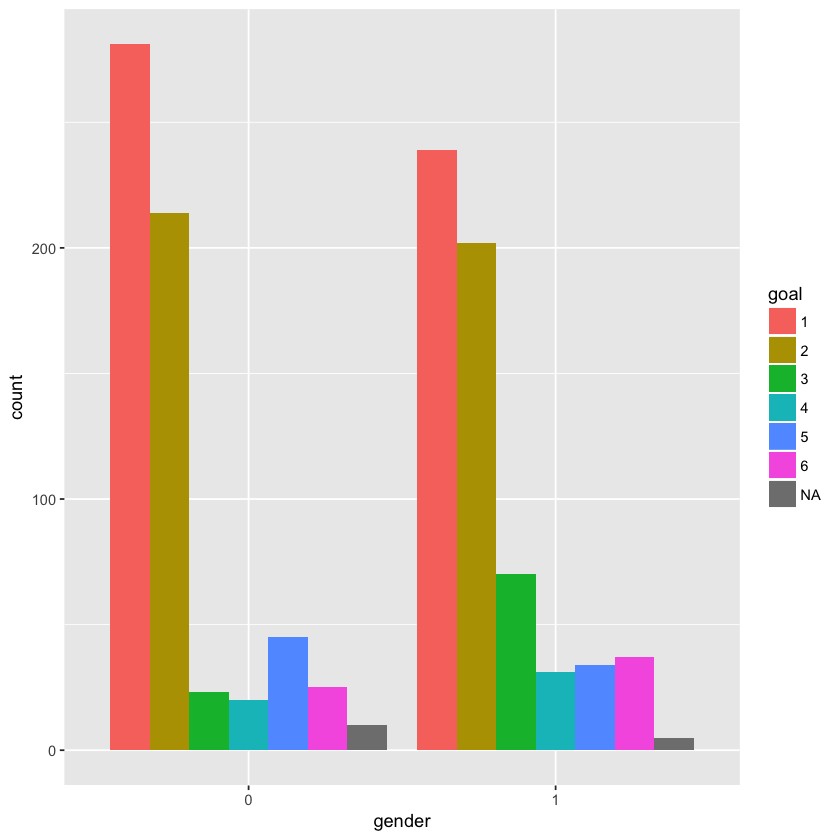

In [9]:
table(match1_selected$gender,match1_selected$goal)
ggplot(data=match1_selected,aes(gender))+ 
      geom_bar(aes(fill=goal),position = "dodge")
#Seemed like a fun night out=1
#To meet new people=2
#To get a date=3
#Looking for a serious relationship=4
#To say I did it=5
#Other=6

# Gender vs Age

Warning message:
: Removed 17 rows containing non-finite values (stat_boxplot).

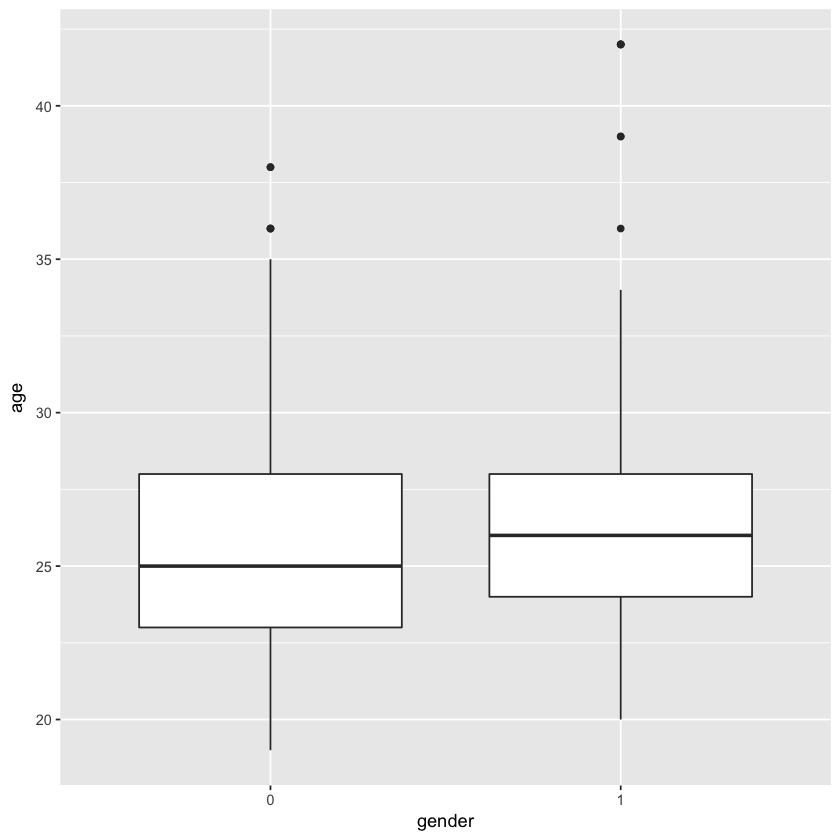

In [10]:

ggplot(data=match1_selected,aes(gender,age)) +
geom_boxplot()

In [11]:
#field_cd

# Gender vs Field(職業)

   
      1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  0  50   9  95  24  17  32  21  77  83  68  39   0  71   8   6   9   0   0
  1  79   9  33   8  64   8  19 229  10  79   2   1  48  15   3   3   1   2

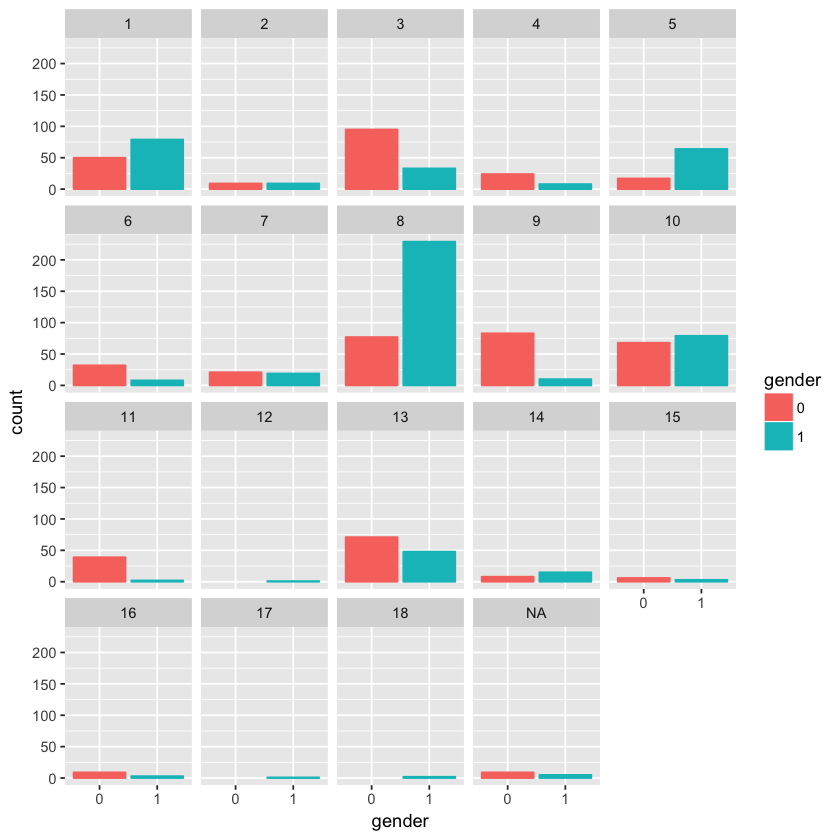

In [12]:
table(match1_selected$gender,match1_selected$field_cd)
ggplot(data=match1_selected,aes(gender,colour=gender))+ 
      geom_bar(aes(fill=gender))+
        facet_wrap(~field_cd )

# Gender vs undergrad

In [13]:
table(match1_selected$gender,match1_selected$undergra)

   
        American University Amherst College
  0 301                   2               0
  1 304                   0               7
   
    Ateneo de Manila University - Philippines Augustana College Barnard College
  0                                         0                 8               6
  1                                         1                 0               0
   
    Bennington College Berklee College Of Music Binghamton University
  0                  1                        3                     1
  1                  0                        0                     0
   
    Biological Sciences Bocconi University Milan Bombay, India Boston College
  0                   4                        0             0              1
  1                   0                        6             2              8
   
    Bowdoin College Brandeis University Brown Brown University
  0               7                   2     3                5
  1               0                   

# Gender vs Income

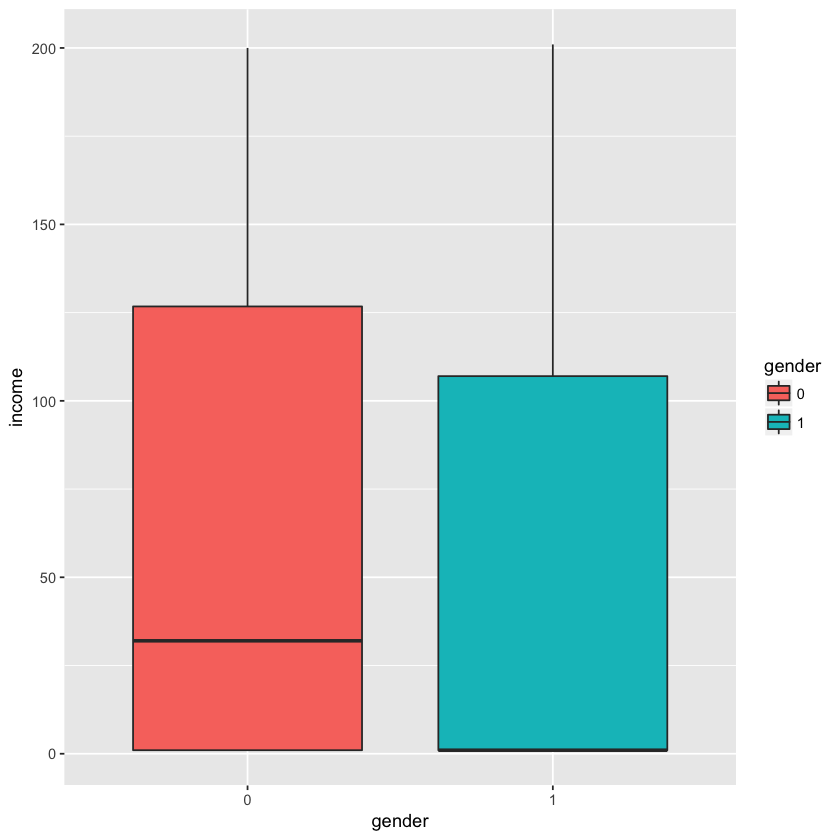

In [14]:
ggplot(data=match1_selected,aes(gender,income)) +
geom_boxplot(aes(fill=gender))


In [15]:
match1_selected<-match1_selected %>%
    mutate_each(funs(as.factor(order=True)),income)

ERROR: Error in eval(expr, envir, enclos): unused argument (order = True)
